In [3]:
import pandas as pd
import numpy as np

% matplotlib inline
import matplotlib.pyplot as plt

from datetime import datetime

from pandas.tseries.offsets import *

## Load files

In [89]:

raw_data = pd.read_csv('raw-data/results.txt', sep='\t', header=None, 
                       names=['algo','level','filename', 'compress_sec','size','uncompress_sec'])


# Convert nan levels to zeros
raw_data['level'].fillna('x', inplace=True)

print(raw_data)

       algo level                                           filename  \
0       raw     x  APLUWCOVISMBSONAR001_20120401T063122.045Z-DIFF...   
1       raw     x  APLUWCOVISMBSONAR001_20120401T121001.449Z-DOPP...   
2       raw     x  APLUWCOVISMBSONAR001_20120401T210919.187Z-DOPP...   
3       raw     x  APLUWCOVISMBSONAR001_20120401T180042.337Z-IMAG...   
4       raw     x  APLUWCOVISMBSONAR001_20120401T124747.207Z-DIFF...   
5       raw     x  APLUWCOVISMBSONAR001_20120401T150042.980Z-IMAG...   
6       raw     x  APLUWCOVISMBSONAR001_20120401T030958.766Z-DOPP...   
7       raw     x  APLUWCOVISMBSONAR001_20120401T034727.647Z-DIFF...   
8       raw     x  APLUWCOVISMBSONAR001_20120401T000042.191Z-IMAG...   
9       raw     x  APLUWCOVISMBSONAR001_20120401T094646.018Z-DIFF...   
10      raw     x  APLUWCOVISMBSONAR001_20120401T000952.221Z-DOPP...   
11      raw     x  APLUWCOVISMBSONAR001_20120401T155139.127Z-DIFF...   
12      raw     x  APLUWCOVISMBSONAR001_20120401T184830.333Z-DIF

## Reprocess data files to get out compression percentages

In [130]:

data = raw_data.set_index(['filename','algo','level'])

## Pull out just the size data
size = data['size'].copy()
size = size.unstack(level=[1,2])

## Add a total size line
total_size = size.sum( axis='index')
#print(total_size)

##
times = data.copy()
times = times.unstack(level=[1,2])
# print(times)

total_times = times.sum( axis='index' )
print(total_times)

                algo    level
compress_sec    raw     x            0.000000
                gzip    1         1134.149519
                pigz    1          229.572421
                bzip2   1         5464.771769
                lbzip2  1          856.941164
                pbzip2  1         1010.160233
                gzip    2         1247.660576
                pigz    2          249.194615
                bzip2   2         5405.056280
                lbzip2  2          841.106214
                pbzip2  2         1007.037122
                gzip    3         1775.783068
                pigz    3          343.999511
                bzip2   3         5442.155884
                lbzip2  3          845.749927
                pbzip2  3         1024.434403
                gzip    4         1626.709995
                pigz    4          329.375821
                bzip2   4         5467.885546
                lbzip2  4          854.386123
                pbzip2  4         1039.557113
    

In [ ]:
## Compute compresion ratios

raw_size = size['raw','x']
pct_compression = size.divide(raw_size, axis='index')
total_compression = total_size / total_size['raw','x']


print(pct_compression)
print(total_compression)

In [131]:
## Create compression ratio plot

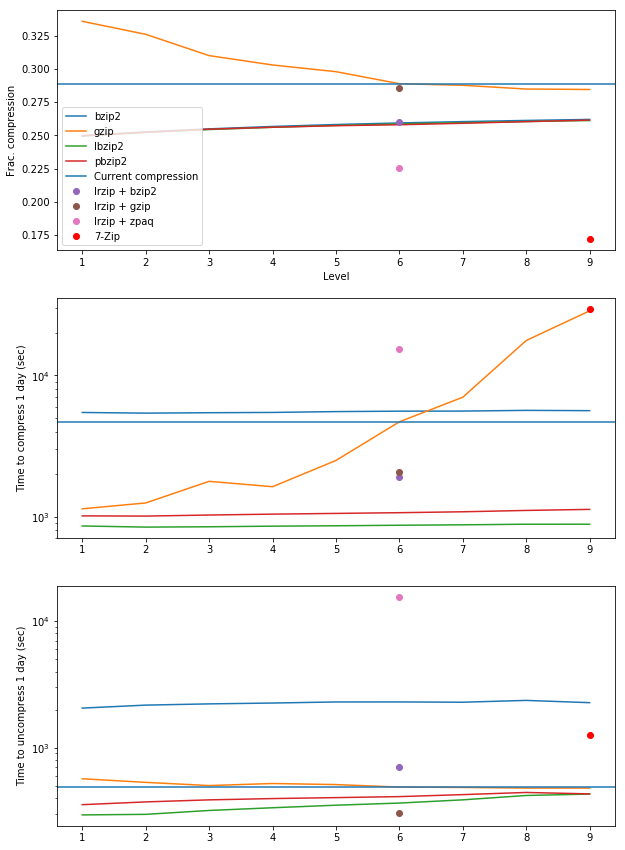

In [141]:
plt.figure()
# Create a figure with a single subplot
f, ax = plt.subplots(3, figsize=(10,15))


for idx,data in enumerate( [total_compression, total_times['compress_sec'], total_times['uncompress_sec']  ]):

    for algo in ['bzip2', 'gzip', 'lbzip2', 'pbzip2']:
        ax[idx].plot( data[algo], label=algo)

    ax[idx].axhline(data['gzip','6'], label='Current compression')
    #ax.plot(6, total_compression['gzip','6'], 'o', label='Current compression')

    ax[idx].plot(6, data['lrzip','bzip2'], 'o', label='lrzip + bzip2')
    ax[idx].plot(6, data['lrzip','gzip'], 'o', label='lrzip + gzip')
    ax[idx].plot(6, data['lrzip','zpaq'], 'o', label='lrzip + zpaq')

    ax[idx].plot(9, data['7z','x'], 'ro', label='7-Zip')

ax[0].legend()
ax[0].set_ylabel("Frac. compression")
ax[0].set_xlabel("Level")

ax[1].set_yscale('log')
ax[1].set_ylabel("Time to compress 1 day (seconds)")

ax[2].set_yscale('log')
ax[2].set_ylabel("Time to uncompress 1 day (seconds)")


plt.show()

